In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [6]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open(r"C:\Users\User\Desktop\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open(r"C:\Users\User\Desktop\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(r"C:\Users\User\Desktop\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
X_validation.shape

(4410, 32, 32, 3)

In [11]:
y_validation.shape

(4410,)

In [13]:
y_train.shape

(34799,)

In [14]:
y_test.shape

(12630,)

25

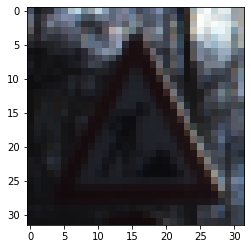

In [17]:
i = 34798
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

13

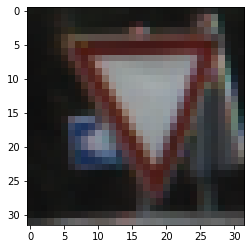

In [37]:
i = 348
plt.imshow(X_test[i]) # Show images are not shuffled
y_test[i]

31

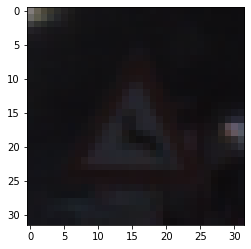

In [36]:
i = 34
plt.imshow(X_validation[i]) # Show images are not shuffled
y_validation[i]

In [38]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [39]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [40]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [41]:
X_train_gray.shape

(34799, 32, 32, 1)

In [42]:
X_test_gray.shape

(12630, 32, 32, 1)

In [43]:
X_validation_gray.shape

(4410, 32, 32, 1)

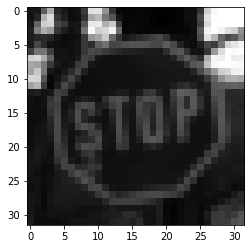

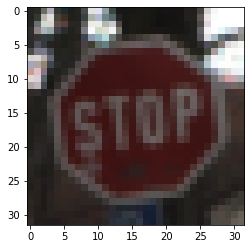

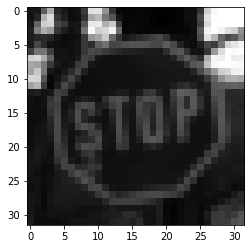

In [46]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')


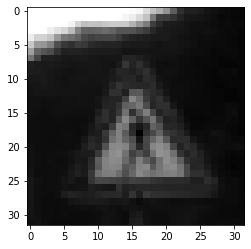

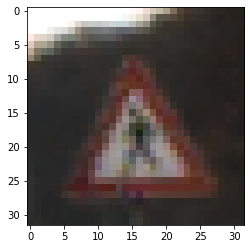

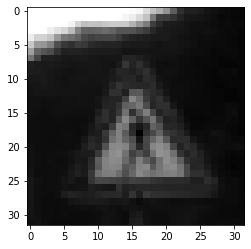

In [47]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')

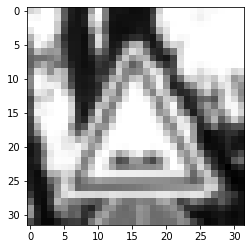

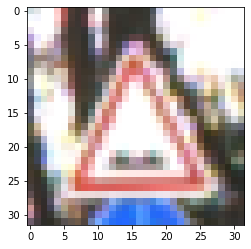

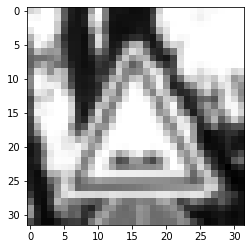

In [48]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')

In [49]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [50]:
image_shape = X_train_gray[i].shape

In [51]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [52]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [56]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 20s 241ms/step - loss: 3.4633 - accuracy: 0.0966 - val_loss: 2.9340 - val_accuracy: 0.2299
Epoch 2/50
70/70 [==============================] - 15s 215ms/step - loss: 2.1936 - accuracy: 0.4076 - val_loss: 1.5853 - val_accuracy: 0.5415
Epoch 3/50
70/70 [==============================] - 15s 215ms/step - loss: 1.0944 - accuracy: 0.6858 - val_loss: 1.1053 - val_accuracy: 0.6794
Epoch 4/50
70/70 [==============================] - 15s 214ms/step - loss: 0.7405 - accuracy: 0.7834 - val_loss: 0.8802 - val_accuracy: 0.7320
Epoch 5/50
70/70 [==============================] - 16s 231ms/step - loss: 0.5725 - accuracy: 0.8362 - val_loss: 0.8246 - val_accuracy: 0.7510
Epoch 6/50
70/70 [==============================] - 15s 213ms/step - loss: 0.4684 - accuracy: 0.8714 - val_loss: 0.7724 - val_accuracy: 0.7778
Epoch 7/50
70/70 [==============================] - 15s 215ms/step - loss: 0.4019 - accuracy: 0.8897 - val_loss: 0.7639 - val_accuracy: 0.7760

In [67]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8475


In [58]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

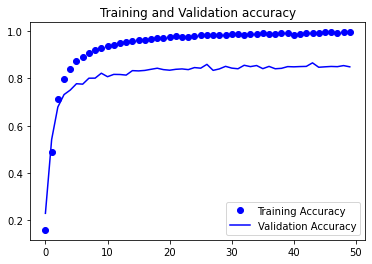

In [60]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


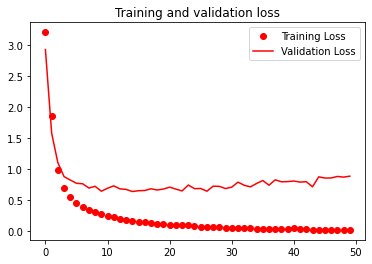

In [61]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [62]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


<AxesSubplot:>

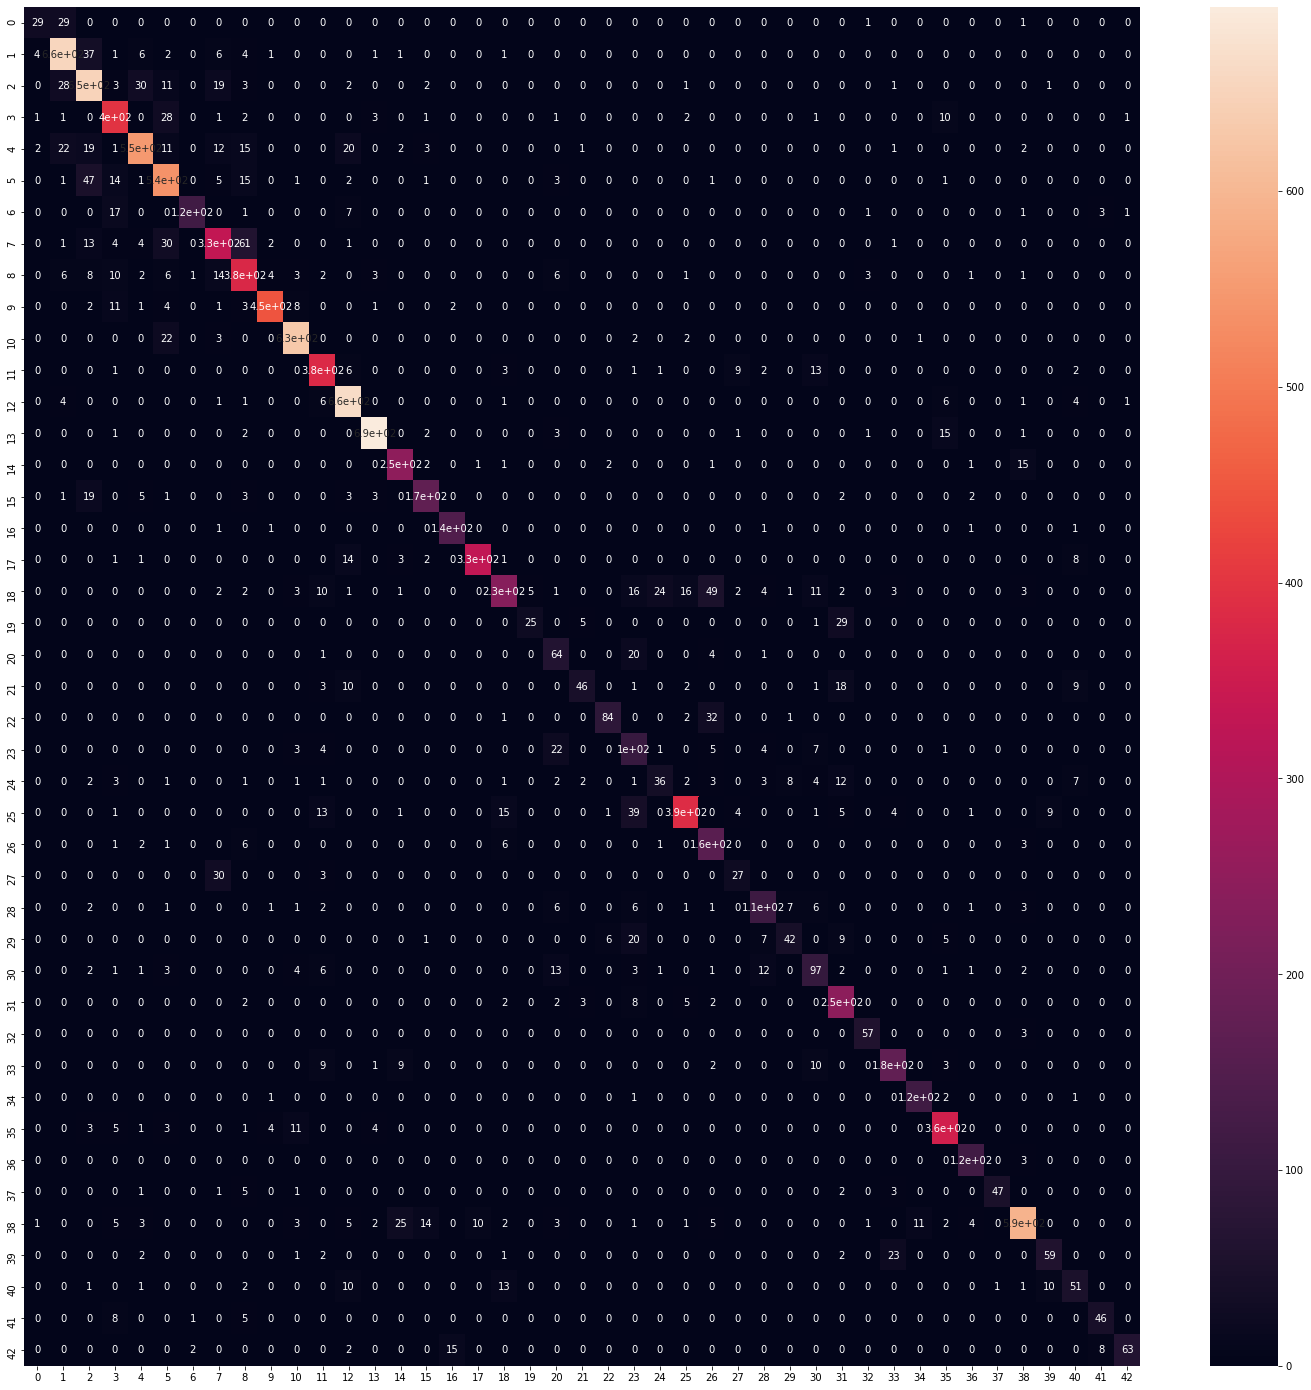

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

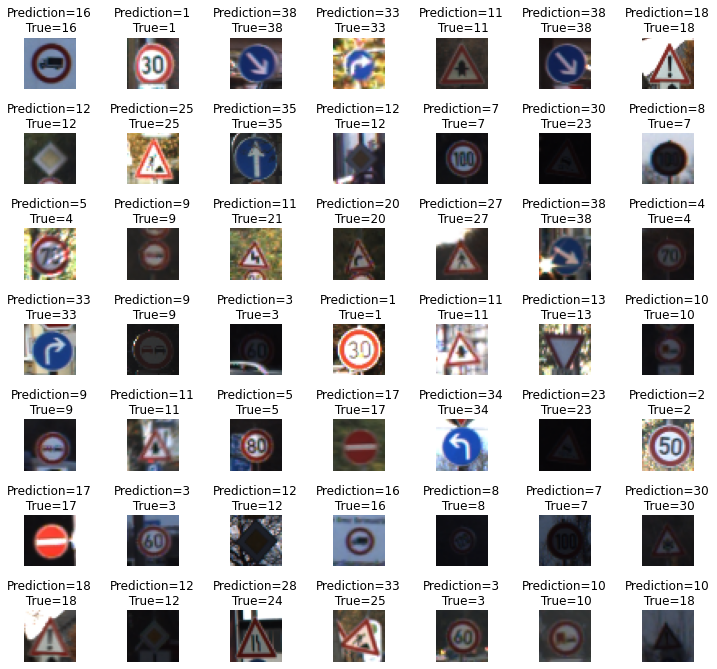

In [64]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)